# Regras

- Pegar uma caracteristica para usar e outra para ser alvo
- Dividir o conjunto entre treino (70%) e  teste (30%)
- Fazer o teste
    - y_pred = b0 + bix
- Avaliar os resultados
    RMSE

## Etapa 1 - Definir Target e Character

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv("regression_dataset.csv")
df

,profit,morning,after_noon,night,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,...,March,April,May,June,July,August,September,October,November,December
0,0.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,0.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232664,1.20,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232665,0.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
232666,1.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
# aux = pd.read_csv("dataset.csv")
# aux

In [15]:
target = df["profit"]
target

0         0.90
1         3.60
2         2.40
3         1.15
4         6.00
          ... 
232663    0.15
232664    1.20
232665    0.30
232666    1.30
232667    1.30
Name: profit, Length: 232668, dtype: float64

In [16]:
character = df["morning"]

In [17]:
# aux["unit_price"] = aux["unit_price"].apply(lambda x: float(x.replace("€", "").replace(",", ".")))
# character = aux["unit_price"]
# character

In [18]:
def my_sum(array: list) -> int | float:
    value = 0

    for number in array:
        value += number

    return value

In [19]:
def my_mean(array: list) -> float:
    
    mean = my_sum(array)

    mean = mean/len(array)

    return mean

In [20]:
def calc_beta_one(character: np.ndarray, target: np.ndarray) -> float:
    x = character
    y = target
    x_mean = my_mean(x)
    y_mean = my_mean(y)

    x_y = (x - x_mean) * (y - y_mean)
    x_x = (x - x_mean) ** 2

    beta_one = my_sum(x_y) / my_sum(x_x)
    return beta_one

In [21]:
def calc_beta_zero(mean_y: float, beta_one, mean_x: float) -> float:
    """
    Cacula Beta Zero

    - Args:
        - mean_y:: Media dos valores da coluna alvo
        - beta_one:: Coeficiente angular
        - mean_x:: Media dos valores da coluna caracteristica
    """

    return mean_y - beta_one * mean_x

In [22]:
def train(beta_zero, beta_one, x):

    data = []

    for value in x:
        data.append(beta_zero + beta_one * value)

    return data

In [23]:
x, y = np.array(character), np.array(target)
beta_one = calc_beta_one(x, y)
beta_one

np.float64(-0.15138052398454546)

In [24]:
beta_zero = calc_beta_zero(
    mean_y=my_mean(np.array(target)),
    beta_one=beta_one,
    mean_x=my_mean(np.array(character))
)
beta_zero

np.float64(2.5181589901251615)

# Etapa 2 - Dividir a Base em 70 - 30

In [25]:
all_values = len(target)
all_values

232668

## 2-1 Dividindo a Base em 70 - 30

In [26]:
num_train = int(
    round(
        0.7 * all_values,
        0
       )
)
num_train

162868

In [27]:
x_data = np.array(character)
y_data = np.array(target)

In [28]:
x_train = x_data[:num_train]
x_test = x_data[num_train:]

y_train = y_data[:num_train]
y_test = y_data[num_train:]

## Etapa 3-1 - Fazer o treino com 70%

In [29]:
beta_one_train = calc_beta_one(x_train, y_train)
beta_one_train

np.float64(-0.16285273584385912)

In [30]:
beta_zero_train = calc_beta_zero(
    mean_y=my_mean(y_train),
    beta_one=beta_one_train,
    mean_x=my_mean(x_train)
)
beta_zero_train

np.float64(2.462772092180042)

In [31]:
pred_train = beta_zero_train + beta_one_train * x_train
pred_train


array([2.29991936, 2.29991936, 2.29991936, ..., 2.46277209, 2.46277209,
       2.46277209])

In [32]:
pred_train = train(beta_zero=beta_zero_train, beta_one=beta_one_train, x=x_train)
pred_train

[np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.float64(2.299919356336183),
 np.floa

## 3-2 - Fase de teste com os 30%

In [33]:
beta_one_test = calc_beta_one(x_test, y_test)
beta_one_test

np.float64(-0.17705594756365667)

In [34]:
beta_zero_test = calc_beta_zero(
    mean_y=my_mean(y_test),
    beta_one=beta_one_test,
    mean_x=my_mean(x_test)
)
beta_zero_test

np.float64(2.684012714626978)

In [35]:
pred_test = beta_zero_test + beta_one_test * x_test
pred_test

array([2.68401271, 2.68401271, 2.68401271, ..., 2.68401271, 2.68401271,
       2.68401271])

## Etapa 4 - Avaliação

In [36]:
def my_sqrt(value: float):

    return value ** (1/2)

In [37]:
def rmse(y_test: np.ndarray, y_pred: np.ndarray, y_num_values: int):
    """
    calculo dos resultados pela raiz media quadrada do erro
    """

    soma = 0

    for idx in range(len(y_test)):

        soma += ((y_test[idx] - y_pred[idx]) ** 2)



    return my_sqrt(soma * (1 / y_num_values))


In [38]:
result = rmse(y_test, pred_test, len(y_test))
result

np.float64(2.6368983991005095)

In [39]:
x_train.shape

(162868,)

In [40]:
y_train.shape

(162868,)

In [41]:
def my_scatter_plot(x, y, beta_one, beta_zero ):
    min_value = min(x)
    max_value = max(x)

    a = np.linspace(min_value, max_value, len(x_train))
    b = beta_one * a + beta_zero

    plt.plot(a, b, "-r")
    plt.scatter(x, y)


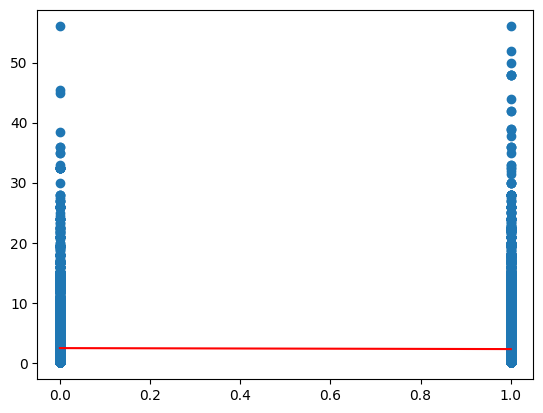

In [42]:
my_scatter_plot(x_train, y_train,beta_one_train, beta_zero_train)

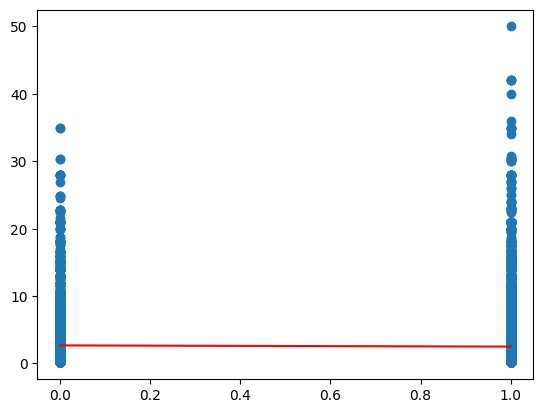

In [43]:
my_scatter_plot(x_test, y_test,beta_one_test, beta_zero_test)

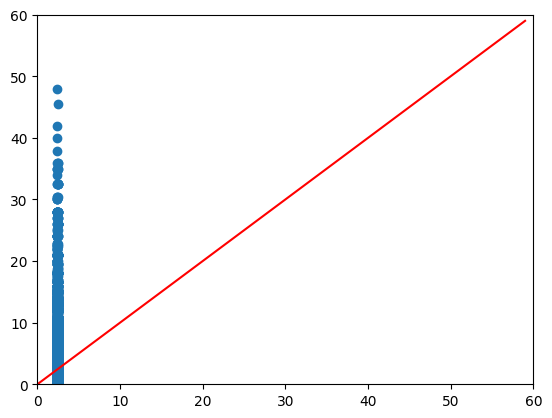

In [57]:
plt.scatter(pred_test, y_test)
plt.xlim([0,60])
plt.ylim([0,60])
plt.plot(range(0,60), range(0,60), "-r")

In [45]:
print(f"X Min {min(x)}\nX Max {max(x)}\nY Min {min(y)}\n Y Max {max(y)}\n")

X Min 0.0
X Max 1.0
Y Min 0.07
 Y Max 56.0



In [46]:
print(f"X Min {min(x_train)}\nX Max {max(x_train)}\nY Min {min(y_test)}\nY Max {max(y_test)}\n")

X Min 0.0
X Max 1.0
Y Min 0.15
Y Max 50.0



In [47]:
print(f"X Min {min(x_test)}\nX Max {max(x_test)}\nY Min {min(y_test)}\nY Max {max(y)}")

X Min 0.0
X Max 1.0
Y Min 0.15
Y Max 56.0


In [48]:
def my_train(x_train, y_train):
    beta_one = calc_beta_one(x_train, y_train)
    beta_zero = calc_beta_zero(mean_y=my_mean(y_train), beta_one=beta_one, mean_x=my_mean(x_train))
    return beta_zero, beta_one

In [49]:
def my_predict(beta_one, beta_zero, x_test):
    return beta_zero + beta_one * x_test

In [50]:
def my_mrse(pred_y, y_test):
    erro = 0

    for i in range(len(pred_y)):

        erro += (pred_y[i] - y_test[i]) ** 2

    erro = (erro/len(pred_y)) ** 0.5
    return erro

In [51]:
def my_variance(values):
    mean = my_mean(values)

    variance = 0

    for value in values:

        variance += (value - mean) ** 2

    variance /= len(values)

    return variance

In [52]:
def my_std(values):

    variance = my_variance(values)

    return variance ** 0.5

In [53]:
errors = []

for _ in range(10):

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7)

    beta_zero, beta_one = my_train(x_train, y_train)
    pred_test = my_predict(beta_one, beta_zero, x_test)

    error = my_mrse(pred_test, y_test)

    errors.append(error)



    print(f"Beta Zero: {beta_zero}\n Beta One: {beta_one}\n RMSE: {error}\n\n\n\n")


print(f"\n Média do erro: {my_mean(errors)}\nDesvio do erro: {my_std(errors)}")
    

Beta Zero: 2.523159798526624
 Beta One: -0.1582643334573484
 RMSE: 2.45504445853186




Beta Zero: 2.5228207168233308
 Beta One: -0.1494939702761065
 RMSE: 2.461455801943743




Beta Zero: 2.518433967037791
 Beta One: -0.1570770830438505
 RMSE: 2.509059503274844




Beta Zero: 2.5297794117657477
 Beta One: -0.16108608058483131
 RMSE: 2.452200046902242




Beta Zero: 2.5179198692385936
 Beta One: -0.15681021334756862
 RMSE: 2.5161183154947744




Beta Zero: 2.5154866947467034
 Beta One: -0.14213776438460682
 RMSE: 2.4746871976518583




Beta Zero: 2.5266631722004775
 Beta One: -0.15225779130753359
 RMSE: 2.4436115294307457




Beta Zero: 2.511144323085617
 Beta One: -0.14149796224715025
 RMSE: 2.4849845674306237




Beta Zero: 2.5136625114260482
 Beta One: -0.14490715008411764
 RMSE: 2.4887309410243463




Beta Zero: 2.51572262745493
 Beta One: -0.14791560439417242
 RMSE: 2.4892985628850797





 Média do erro: 2.4775190924570114
Desvio do erro: 0.02316641388017619


In [54]:
def my_calc_error(x_train, y_train, x_test, y_test) -> float:
        """
        """
        beta_zero, beta_one = my_train(x_train, y_train)
        
        pred_test = my_predict(beta_one, beta_zero, x_test)

        error = my_mrse(pred_test, y_test)

        return error
 

def show_results(errors: list[float]) -> None:
        
        print(f"\n Média do erro: {my_mean(errors)}\nDesvio do erro: {my_std(errors)}")

## Aplicar o K-FOLD na Base

In [55]:
from random import shuffle

def k_fold(data: np.ndarray, target: np.ndarray, k: int=5, random: bool=True):
    # Embaralhar os dados
    if random:
        combined = list(zip(data, target))
        shuffle(combined)
        data[:], target[:] = zip(*combined) # * serve pra descompactar a lista de tuplas para o zip conseguir remontar os dados
        

    fold_size = len(data) // k
    errors = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        x_test = data[start:end]
        y_test = target[start:end]

        x_train = np.concatenate([data[:start], data[end:]]) # Seleciona os dados de treino para o fold atual. Pega todos os dados antes do índice start e todos os dados após o índice end, e os concatena.
        y_train = np.concatenate([target[:start], target[end:]]) # Seleciona os alvos de treino para o fold atual. Pega todos os alvos antes do índice start e todos os alvos após o índice end, e os concatena.
        
        errors.append(my_calc_error(x_train, y_train, x_test, y_test))


    return errors


In [56]:
errors = k_fold(x_data, y_data, k=10)

show_results(errors)


 Média do erro: 2.488216875941269
Desvio do erro: 0.04100999231988828
